In [1]:
import os
# Get the current working directory
current_dir = os.getcwd()
# Set the data directory to the parent directory of the current working directory
wdir = os.path.dirname(current_dir)
# Change the current working directory to the parent directory
os.chdir(wdir)

In [2]:
import sys
sys.path.append('src')
import muller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [4]:
# Set the font globally
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 9
rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9

In [3]:
# Load data muller plots
# No Chronical disaese
df_pop_0 = pd.read_csv('data/Fig_3/populations_df_no_cd_bf_m_0.001_ts_2.csv');
df_adj_0 = pd.read_csv('data/Fig_3/df_adj_no_cd_bf_m_0.001_ts_2.csv');
df_size_0 = pd.read_csv('data/Fig_3/variant_size_df_no_cd_bf_m_0.001_ts_2.csv');
# Chronical disaese -No mutation burst
df_pop_1 = pd.read_csv('data/Fig_3/populations_cd_no_jump_bf_m_0.001_ts_2.csv');
df_adj_1 = pd.read_csv('data/Fig_3/df_adj_cd_no_jump_bf_m_0.001_ts_2.csv');
df_size_1 = pd.read_csv('data/Fig_3/variant_size_cd_no_jump_bf_m_0.001_ts_2.csv');
# Chronical disaese - Mutation burst
df_pop_2 = pd.read_csv('data/Fig_3/populations_df_one_jump_bf_m_0.001_ts_2.csv');
df_adj_2 = pd.read_csv('data/Fig_3/df_adj_cd_one_jump_bf_m_0.001_ts_2.csv');
df_size_2 = pd.read_csv('data/Fig_3/variant_size_df_one_jump_bf_m_0.001_ts_2.csv');
# same scale for all populations
number_of_variants=len(df_adj_2)+1
norm_range = (1, number_of_variants)
# Load data average number of mutations
av_mut_0 = np.loadtxt("data/Fig_3/av_number_of_mutations_vs_t_pop_0.txt")
av_mut_1 = np.loadtxt("data/Fig_3/av_number_of_mutations_vs_t_pop_1.txt")
av_mut_2 = np.loadtxt("data/Fig_3/av_number_of_mutations_vs_t_pop_2.txt")
steps = 2
# Define time range
T = len(av_mut_0) 

In [7]:
# define plotwidth
def cm2inch(x): return float(x)/2.54
plotwidth    = cm2inch(8.90)

/var/folders/ss/2frlt8v119514lf5x00hdshh0000gn/T/ipykernel_17321/2242032940.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels([0, 200, 400, 600, 800, 1000])
/var/folders/ss/2frlt8v119514lf5x00hdshh0000gn/T/ipykernel_17321/2242032940.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())


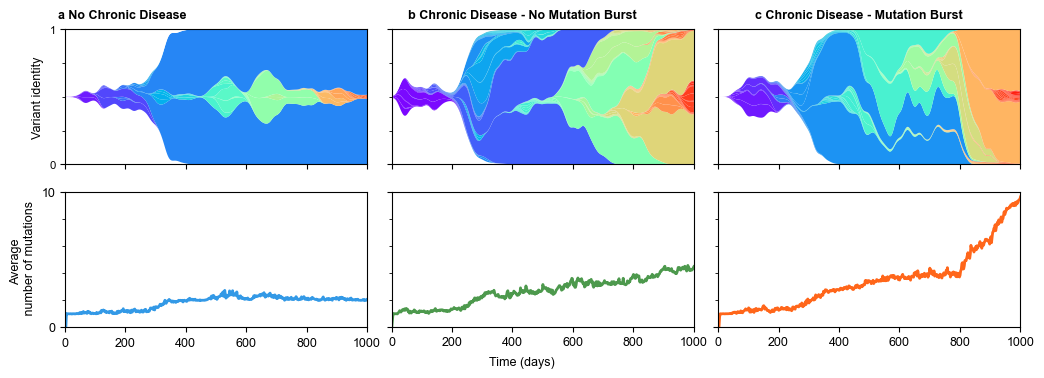

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(3*plotwidth, plotwidth))  # 2 rows, 3 columns
fig.text(0.5,0.0, 'Time (days)', ha='center', va='center')

axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Average \n number of mutations')
axs[1,0].set_ylim(0, 10.0)
axs[1,0].set_xlim(0, 1001)
axs[1,0].tick_params(axis='both', which='major')
axs[1,0].set_xticklabels([0, 200, 400, 600, 800, 1000])
axs[1,0].set_yticks([0.0,10.0])
axs[1,0].set_yticks([2.0, 4.0, 6.0, 8.0], minor=True)
#
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')
axs[1,1].set_ylim(0, 10.0)
axs[1,1].set_xlim(0, 1001)
axs[1,1].tick_params(axis='both', which='major',labelcolor='black', pad=3)
axs[1,1].set_yticks([0.0,10.0])
axs[1,1].set_yticks([2.0, 4.0, 6.0, 8.0], minor=True)
axs[1,1].set_yticklabels('')
#
axs[1,2].set_xlabel('')
axs[1,2].set_ylabel('')
axs[1,2].set_ylim(0, 10.0)
axs[1,2].set_xlim(0, 1001)
axs[1,2].tick_params(axis='both', which='major',labelcolor='black', pad=3)
axs[1,2].set_yticks([0.0,10.0])
axs[1,2].set_yticks([2.0, 4.0, 6.0, 8.0], minor=True)
axs[1,2].set_yticklabels('')

## Muller Plots

# axs[0, 0]
number_of_variants=len(df_adj_0)+1
color_data = {}
for i in range(number_of_variants):
    key = str(i+1)
    value = float(i+1)
    color_data[key] = value
color_by_id = pd.Series(color_data,name='Variant identity')
muller._muller_plot(df_pop_0, df_adj_0, color_by_id, smoothing_std=10, colormap='rainbow', normalize=True, norm_range=norm_range, ax=axs[0,0])
axs[0, 0].set_yticklabels((0,1))
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Variant identity')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticklabels('')

### axs[0, 1]
number_of_variants=len(df_adj_1)+1
color_data = {}
# Replace the range limit with your desired number (e.g., 30)
for i in range(number_of_variants):
    key = str(i+1)
    value = float(i+1)
    color_data[key] = value
color_by_id = pd.Series(color_data,name='Variant identity')

muller._muller_plot(df_pop_1, df_adj_1, color_by_id, smoothing_std=10, colormap='rainbow', normalize=True, norm_range=norm_range, ax=axs[0, 1])
axs[0, 1].set_yticklabels('')
axs[0, 1].set_xticklabels('')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticklabels('')

#axs[0, 2]
number_of_variants=len(df_adj_2)+1
color_data = {}
# Replace the range limit with your desired number (e.g., 30)
for i in range(number_of_variants):
    key = str(i+1)
    value = float(i+1)
    color_data[key] = value
color_by_id = pd.Series(color_data,name='Variant identity')

muller._muller_plot(df_pop_2, df_adj_2, color_by_id,smoothing_std=10, colormap='rainbow', normalize=True, norm_range=norm_range, ax=axs[0, 2])
axs[0, 2].set_yticklabels('')
axs[0, 2].set_xticklabels('')
axs[0, 2].set_xlabel('')
axs[0, 2].set_ylabel('')
axs[0, 2].set_xlabel('')


## Average number of mutations plots

axs[1,0].plot(np.arange(1, T + 1, steps), av_mut_0[::steps], linewidth=2, color=(0.2, 0.6, 0.9))
axs[1,1].plot(np.arange(1, T + 1, steps), av_mut_1[::steps], linewidth=2, color=(0.3, 0.6,0.3))
axs[1,2].plot(np.arange(1, T + 1, steps), av_mut_2[::steps], linewidth=2, color=(1.0, 0.4,0.1))



fig.text(0.12, 0.99, 'a No Chronic Disease', ha='center', va='center',weight='bold')
fig.text(0.5, 0.99, 'b Chronic Disease - No Mutation Burst', ha='center', va='center', weight='bold')
fig.text(0.82, 0.99, 'c Chronic Disease - Mutation Burst', ha='center', va='center',weight='bold')

fig.tight_layout()
plt.subplots_adjust(bottom=0.1,hspace=0.2,wspace=0.08)